In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
# dimensions of our images (new resolution)
w, h = 75, 75  

# path to image folders
train_dir = 'fruits-360/Training/'
test_dir = 'fruits-360/Test/'
train_samples = 67692
validation_samples = 22688
batch_size = 1000
num_epochs = 50

In [33]:
train_datagen = ImageDataGenerator(rescale=1./ 255)
test_datagen = ImageDataGenerator(rescale=1./ 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(h, w),
    batch_size=batch_size,
    seed=42,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(h, w),
    batch_size=batch_size,
    seed=42,
    class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [34]:
def my_model():
    # weight and bias initializers
    w = tf.keras.initializers.GlorotUniform(seed=99)
    b = tf.keras.initializers.Zeros()
    # create the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                               bias_initializer=b, kernel_initializer=w, input_shape=(75,75,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu',
                               bias_initializer=b, kernel_initializer=w),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, bias_initializer=b, kernel_initializer=w, activation='relu'),
        tf.keras.layers.Dense(131, bias_initializer=b, kernel_initializer=w, activation='softmax')
    ], name='fruits_model')
    return model

In [35]:
model = my_model()
model.summary()

Model: "fruits_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
batch_normalization_6 (Batch (None, 34, 34, 128)       512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 34, 34, 128)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 36992)            

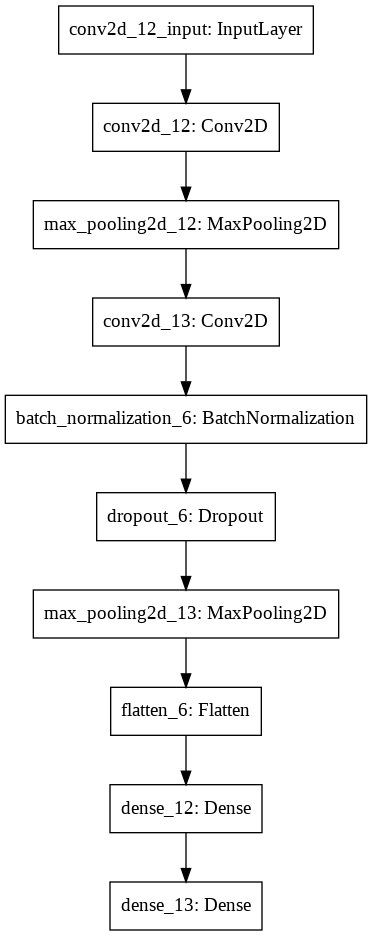

In [36]:
tf.keras.utils.plot_model(model)

In [37]:
# instantiate the optimizer
optmz = tf.keras.optimizers.Adam()
# compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
# fit the parameters
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples//batch_size,
    epochs=num_epochs,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = validation_samples//batch_size)

Epoch 1/50
67/67 [==============================] - 55s 820ms/step - loss: 0.9575 - accuracy: 0.8146 - val_loss: 3.1582 - val_accuracy: 0.4450
Epoch 2/50
67/67 [==============================] - 52s 779ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 2.4096 - val_accuracy: 0.6487
Epoch 3/50
67/67 [==============================] - 52s 776ms/step - loss: 4.4031e-04 - accuracy: 1.0000 - val_loss: 1.8280 - val_accuracy: 0.6833
Epoch 4/50
67/67 [==============================] - 52s 780ms/step - loss: 2.1634e-04 - accuracy: 1.0000 - val_loss: 1.3977 - val_accuracy: 0.6792
Epoch 5/50
67/67 [==============================] - 52s 780ms/step - loss: 1.2610e-04 - accuracy: 1.0000 - val_loss: 1.0899 - val_accuracy: 0.6974
Epoch 6/50
67/67 [==============================] - 52s 783ms/step - loss: 9.6542e-05 - accuracy: 1.0000 - val_loss: 0.9574 - val_accuracy: 0.7144
Epoch 7/50
67/67 [==============================] - 52s 776ms/step - loss: 7.5999e-05 - accuracy: 1.0000 - val_loss: 0.8909 - 

In [38]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Training accuracy after 50 epochs:  1.0
Testing accuracy after 50 epochs: 0.6714


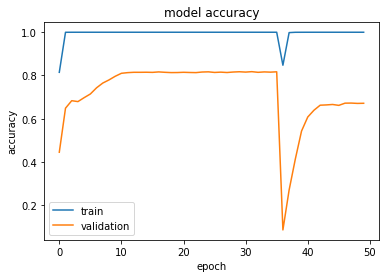

In [43]:
print('Training accuracy after 50 epochs: ',history.history['accuracy'][-1])
print('Testing accuracy after 50 epochs: %.4f'%history.history['val_accuracy'][-1])
# plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

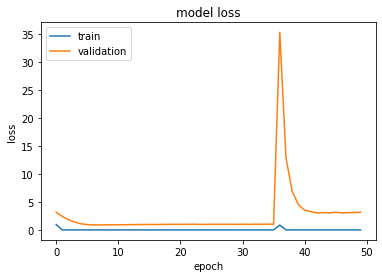

In [44]:
# plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Note that using Early Stopping, we could have saved the model parameters  after 36 or 37 iterations, where both training and validation losses are minimzed.